# EDA - Exploratory Data Analysis

## 0 Setup & load

In [1]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 62.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 51.4 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [pillow]
   ---------------------------------------- 0/6 [pillow]
   ---------------------------------------- 0/6 [pillow]
   ---------------------------------------- 0/6 [pillow]
   ---------------------------------------- 0/6 [pillow]
   ---------------------------------------- 0/6 [pillow]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === tweak this line if your file lives elsewhere ===
DATA_PATH = Path("C:\\Programming\\JobInterviewTasks\\5Element\\backend\\scripts\\LLM-DataScientist-Task_Data.csv_labelled_longtraining.csv")

df = pd.read_csv(DATA_PATH)

# quick sanity-check
display(df.head())
print(df.info())


id_user  timestamp    source                                 message  \
0     4844  11/1/2024  livechat           "What time is it where u are"   
1     3985  11/1/2024  livechat  "What happened to the Cashback piggy?"   
2     2578  11/1/2024  livechat                           "Deactivated"   
3     1040  11/1/2024  telegram        "It says access issues detected"   
4     4288  11/1/2024  livechat                         "Im in arizona"   

                        category  
0  {"label": "Irrelevant/Other"}  
1        {"Irrelevant/Other":""}  
2        {"Irrelevant/Other":""}  
3      {"Account Management":""}  
4  {"label": "Irrelevant/Other"}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4527 entries, 0 to 4526
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_user    4527 non-null   int64 
 1   timestamp  4527 non-null   object
 2   source     4527 non-null   object
 3   message    4527 non-null   object
 4   category   4527 non-null   object
dtypes: int64(1), object(4)
memory usage: 177.0+ KB
None


## 1 Light data enrichment

In [14]:
# basic text metrics
df["msg_len_chars"] = df["message"].str.len()
df["msg_len_words"] = df["message"].str.split().str.len()

# parse timestamp if you have one — change the column name if needed
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["date"]       = df["timestamp"].dt.date
    df["week"]       = df["timestamp"].dt.to_period("W").apply(lambda r: r.start_time.date())


In [15]:
df

id_user  timestamp    source  \
0        4844 2024-11-01  livechat   
1        3985 2024-11-01  livechat   
2        2578 2024-11-01  livechat   
3        1040 2024-11-01  telegram   
4        4288 2024-11-01  livechat   
...       ...        ...       ...   
4522    23288 2025-01-30  livechat   
4523    22020 2025-01-30  livechat   
4524    22025 2025-01-30  livechat   
4525    23028 2025-01-30  livechat   
4526     1343 2025-01-30  livechat   

                                                message  \
0                         "What time is it where u are"   
1                "What happened to the Cashback piggy?"   
2                                         "Deactivated"   
3                      "It says access issues detected"   
4                                       "Im in arizona"   
...                                                 ...   
4522        "should i cancel it and use somethinf else"   
4523  "since you said you dont do payouts to revolut...   
4524  "so i will upload all the remaining documents ...   
4525                           "yes sure i can do that"   
4526                           "Ynoscnai muhmai  mynma"   

                                   category  msg_len_chars  msg_len_words  \
0             {"label": "Irrelevant/Other"}             29              7   
1                   {"Irrelevant/Other":""}             38              6   
2                   {"Irrelevant/Other":""}             13              1   
3                 {"Account Management":""}             32              5   
4             {"label": "Irrelevant/Other"}             15              3   
...                                     ...            ...            ...   
4522          {"label": "Irrelevant/Other"}             43              8   
4523  {"Withdrawal / Cash Out Problems":""}            110             21   
4524     {"Verification and Compliance":""}             51              9   
4525          {"label": "Irrelevant/Other"}             24              6   
4526               {"Irrelevant/Other": ""}             24              3   

            date        week  
0     2024-11-01  2024-10-28  
1     2024-11-01  2024-10-28  
2     2024-11-01  2024-10-28  
3     2024-11-01  2024-10-28  
4     2024-11-01  2024-10-28  
...          ...         ...  
4522  2025-01-30  2025-01-27  
4523  2025-01-30  2025-01-27  
4524  2025-01-30  2025-01-27  
4525  2025-01-30  2025-01-27  
4526  2025-01-30  2025-01-27  

[4527 rows x 9 columns]

## 2 Overall category mix (bar chart)

C:\Users\legom\AppData\Local\Temp\ipykernel_293348\4146998596.py:12: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Programming\anaconda3\envs\5Element\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


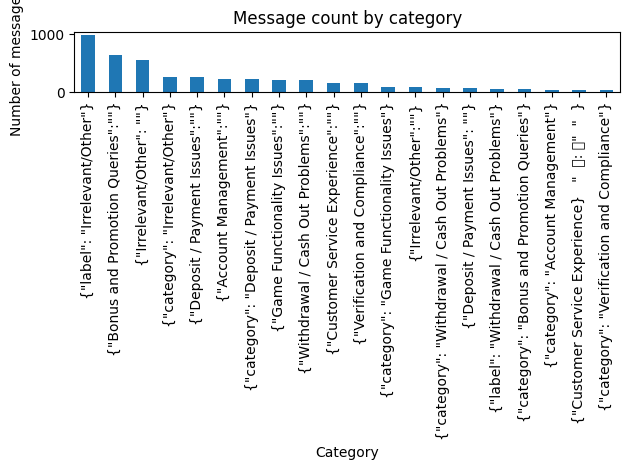

In [22]:
cat_counts = (
    df["category"]
      .value_counts()          # count messages per category
      .loc[lambda s: s > 20]   # keep only categories with > 10 messages
      .sort_values(ascending=False)
)
plt.figure()
cat_counts.plot(kind="bar")
plt.title("Message count by category")
plt.ylabel("Number of messages")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


## 3 How traffic evolved over time

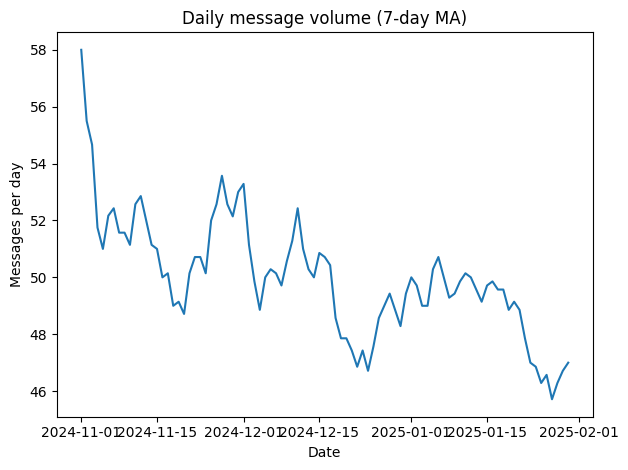

In [17]:
plt.figure()
(
    df.groupby("date")["message"]
      .count()
      .rolling(window=7, min_periods=1).mean()   # 7-day moving avg
).plot()
plt.title("Daily message volume (7-day MA)")
plt.ylabel("Messages per day")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


## 4 Category share over time (area chart)

In [18]:
if "week" in df.columns:
    weekly = (
        df.groupby(["week", "category"])["message"]
          .count()
          .unstack(fill_value=0)
          .sort_index()
    )
    weekly_pct = weekly.div(weekly.sum(axis=1), axis=0)

    plt.figure()
    weekly_pct.plot(kind="area", stacked=True)
    plt.title("Weekly share of categories")
    plt.ylabel("Proportion of weekly traffic")
    plt.xlabel("Week")
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()


C:\Users\legom\AppData\Local\Temp\ipykernel_293348\3971903443.py:16: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\legom\AppData\Local\Temp\ipykernel_293348\3971903443.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

c:\Programming\anaconda3\envs\5Element\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


## 5 Message length by category (box-and-whisker)

In [19]:
plt.figure()
df.boxplot(column="msg_len_words", by="category", vert=True, showfliers=False)
plt.suptitle("")  # drop default
plt.title("Distribution of message length (words) by category")
plt.ylabel("Words per message")
plt.xlabel("Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\legom\AppData\Local\Temp\ipykernel_293348\3147519800.py:8: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\legom\AppData\Local\Temp\ipykernel_293348\3147519800.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

MemoryError: bad allocation

<Figure size 640x480 with 1 Axes>

## 6 Top keywords per category (quick look)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# small helper to strip very common English stop-words
tfidf = TfidfVectorizer(
    stop_words="english",
    max_df=0.95,  # ignore words in >95 % of docs
    min_df=5,     # ignore extremely rare words
    ngram_range=(1,2)
)

for cat in df["category"].unique():
    sub = df.loc[df["category"] == cat, "message"].fillna("")
    if len(sub) < 10:         # skip tiny buckets
        continue
    X = tfidf.fit_transform(sub)
    scores = zip(tfidf.get_feature_names_out(), X.sum(axis=0).A1)
    top10  = sorted(scores, key=lambda x: x[1], reverse=True)[:10]
    print(f"\n=== {cat} ===")
    for word, sc in top10:
        print(f"{word:<25} {sc:6.1f}")



=== {"label": "Irrelevant/Other"} ===
thank                       41.0
ok                          40.9
thanks                      29.2
just                        27.2
yes                         26.1
did                         23.0
check                       21.8
good                        19.7
time                        18.7
hello                       18.6

=== {"Irrelevant/Other":""} ===
just                         6.1
play                         6.1
bitcoin                      4.7
scam                         4.7

=== {"Account Management":""} ===
account                     52.9
email                       16.1
disabled                    15.3
account disabled            12.1
new                          8.5
just                         8.3
close                        7.9
close account                7.5
suspended                    7.1
locked                       6.7

=== {"Bonus and Promotion Queries":""} ===
spins                       67.0
bonus                   